In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [3]:
data = pd.read_csv("wine.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [33]:
feature_cols =  [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]

X = data[feature_cols]
y = data["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

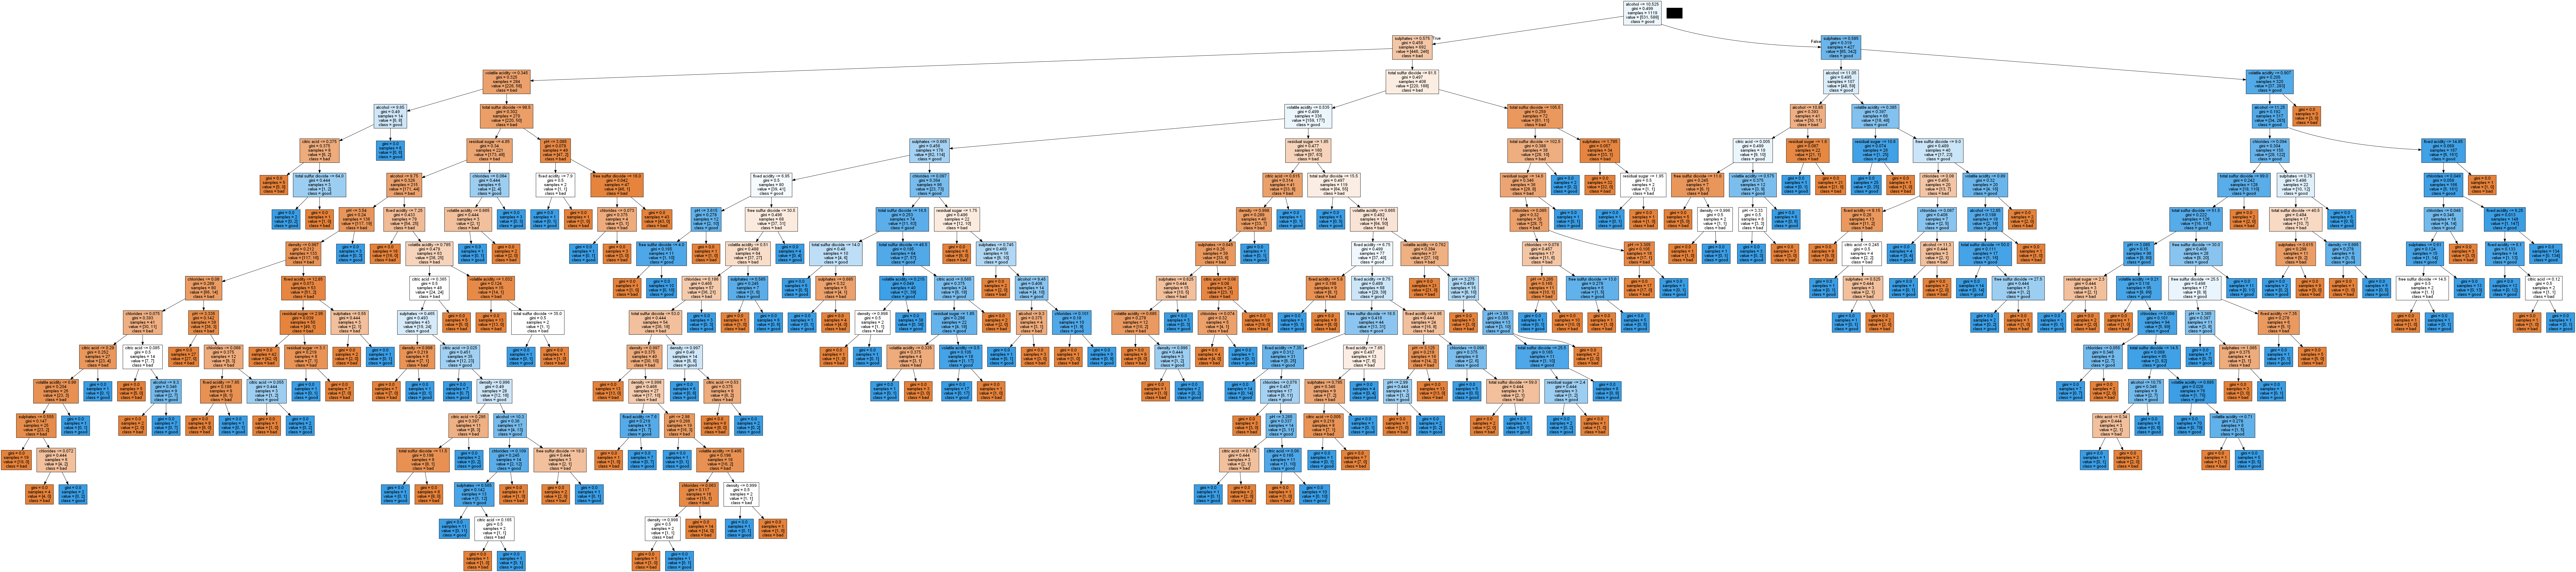

In [51]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=feature_cols, class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('kviz/3.png')
Image(graph.create_png())

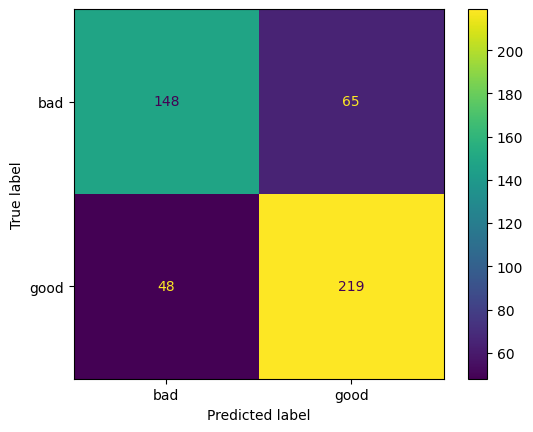

In [52]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [53]:
accuracy_score(y_test, y_pred)

0.7645833333333333

In [5]:
import numpy as np

data = pd.read_csv("predictive_maintenance.csv")
categorical_columns = ["Type"]

ohe = OneHotEncoder()
encoded_columns = ohe.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

y = data["Failure Type"]


array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [7]:
numeric_columns = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]
others = data[numeric_columns].to_numpy()
X

array([[0.000e+00, 0.000e+00, 1.000e+00, ..., 1.551e+03, 4.280e+01,
        0.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.408e+03, 4.630e+01,
        3.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.498e+03, 4.940e+01,
        5.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.645e+03, 3.340e+01,
        2.200e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.408e+03, 4.850e+01,
        2.500e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.500e+03, 4.020e+01,
        3.000e+01]])